In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key_weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

In [5]:
#Perform API Calls

#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

api_key = api_key_weather

# Starting URL for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [8]:
print(cities)

['cape%20town', 'luderitz', 'saint-philippe', 'padang', 'khilok', 'tautira', 'jhargram', 'punta%20arenas', 'tumannyy', 'barrow', 'dikson', 'hermanus', 'garowe', 'hithadhoo', 'rikitea', 'hilo', 'avarua', 'emba', 'yinchuan', 'khatanga', 'bahia%20blanca', 'miles%20city', 'ulaanbaatar', 'bubaque', 'sola', 'bredasdorp', 'nizhneyansk', 'ahipara', 'atuona', 'naze', 'umzimvubu', 'port%20blair', 'caravelas', 'barentsburg', 'urdoma', 'sentyabrskiy', 'ossora', 'arraial%20do%20cabo', 'puerto%20ayora', 'ribeira%20grande', 'mataura', 'illoqqortoormiut', 'haines%20junction', 'lasa', 'ugoofaaru', 'attawapiskat', 'thompson', 'hobart', 'busselton', 'samusu', 'sao%20filipe', 'de%20aar', 'pemangkat', 'severo-kurilsk', 'taolanaro', 'vao', 'meyungs', 'yellowknife', 'wulanhaote', 'ushuaia', 'tahe', 'cherskiy', 'praia', 'svetlogorsk', 'mount%20gambier', 'baft', 'labuan', 'maxixe', 'panjab', 'bolshegrivskoye', 'ballina', 'honiara', 'novotalitsy', 'vilyuysk', 'jamestown', 'amga', 'bluff', 'manggar', 'hasaki', '

In [9]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []



record = 1


# Make a loop through all cities in the list
for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        
        record= record + 1
        
  
        
    # Except method
    except:
        print("No match found. Next.")
    continue

Processing Record 1 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=cape%20town
Processing Record 2 | Luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=luderitz
Processing Record 3 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=saint-philippe
Processing Record 4 | Padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=padang
Processing Record 5 | Khilok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=khilok
Processing Record 6 | Tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=tautira
Processing Record 7 | Jhargram
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=jh

Processing Record 56 | Maxixe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=maxixe
Processing Record 57 | Panjab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=panjab
No match found. Next.
Processing Record 58 | Ballina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=ballina
Processing Record 59 | Honiara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=honiara
No match found. Next.
Processing Record 60 | Vilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=vilyuysk
Processing Record 61 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=jamestown
Processing Record 62 | Amga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20

Processing Record 112 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=dunedin
Processing Record 113 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=nanortalik
Processing Record 114 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=ancud
Processing Record 115 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=esperance
Processing Record 116 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=dingle
Processing Record 117 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=kavieng
Processing Record 118 | Puerto Escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217

Processing Record 167 | Camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=camacha
Processing Record 168 | Quelimane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=quelimane
Processing Record 169 | Dodoma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=dodoma
Processing Record 170 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=tiksi
Processing Record 171 | Jinchang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=jinchang
Processing Record 172 | Kasongo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=kasongo
Processing Record 173 | Butka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=butka
Pro

Processing Record 223 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=ixtapa
Processing Record 224 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=longyearbyen
Processing Record 225 | Villaviciosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=villaviciosa
Processing Record 226 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=half%20moon%20bay
Processing Record 227 | Northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=northam
Processing Record 228 | Constantine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=constantine
Processing Record 229 | Luganville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 279 | Tuy Hoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=tuy%20hoa
Processing Record 280 | Port Augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=port%20augusta
No match found. Next.
Processing Record 281 | Zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=zyryanka
Processing Record 282 | Karatau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=karatau
Processing Record 283 | Baghmara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=baghmara
Processing Record 284 | Maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=maceio
Processing Record 285 | Mandal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b2

Processing Record 334 | Santa Fe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=santa%20fe
Processing Record 335 | Turtas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=turtas
Processing Record 336 | Fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=fortuna
Processing Record 337 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=saskylakh
Processing Record 338 | Prince Rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=prince%20rupert
Processing Record 339 | Bull Savanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=bull%20savanna
Processing Record 340 | Chodavaram
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20f

Processing Record 390 | Sao Miguel do Araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=sao%20miguel%20do%20araguaia
Processing Record 391 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=norman%20wells
Processing Record 392 | Waingapu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=waingapu
Processing Record 393 | Corinth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=corinth
Processing Record 394 | Ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=ketchikan
Processing Record 395 | Oistins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=oistins
Processing Record 396 | Kirensk
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 446 | Altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=altay
Processing Record 447 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=nouadhibou
Processing Record 448 | Glossa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=glossa
Processing Record 449 | Poiares
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=poiares
Processing Record 450 | Itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=itarema
Processing Record 451 | Neiafu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=neiafu
Processing Record 452 | Okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=okhotsk
P

Processing Record 502 | Okha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=okha
Processing Record 503 | Predivinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=predivinsk
Processing Record 504 | Hay River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=hay%20river
Processing Record 505 | Santiago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=santiago
Processing Record 506 | Bintulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=bintulu
Processing Record 507 | Korsakovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f65&q=korsakovo
Processing Record 508 | Angren
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed0b20ff81696a42c6cbfefbdb217f6

In [ ]:
#Convert Raw Data to DataFrame

#Export the city data into a .csv.
#Display the DataFrame

In [13]:
weatherpy_dic = {"City": city_name,"Cloudiness":cloudiness, "Country":country,"Date":date, "Humidity": humidity,"Latitude":lat, 
"Longitude":lng, "Max Temp": max_temp,"Wind Speed":wind_speed}

weather_df = pd.DataFrame(weatherpy_dic)

weather_df.count()

City          533
Cloudiness    533
Country       533
Date          533
Humidity      533
Latitude      533
Longitude     533
Max Temp      533
Wind Speed    533
dtype: int64

In [16]:
# Export City Data to CSV
weather_df.to_csv('cities_weather_data.csv')

#Display the DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Cape Town,75,ZA,1563589869,81,-33.93,18.42,50.00,11.41
1,Luderitz,0,NA,1563590122,77,-26.65,15.16,56.23,25.93
2,Saint-Philippe,1,CA,1563590122,74,45.36,-73.48,82.40,17.22
3,Padang,72,ID,1563590033,79,-0.92,100.36,79.99,6.53
4,Khilok,100,RU,1563590123,64,51.36,110.46,68.47,6.20


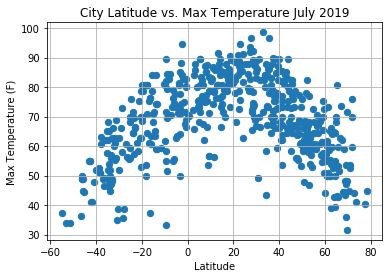

In [30]:
#Plotting the Data

#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

#Latitude vs. Temperature Plot

plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="o", s=40)
plt.title("City Latitude vs. Max Temperature July 2019")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("MaxTemp_vs_Latitude.png")
plt.show()

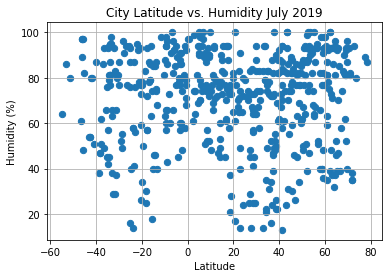

In [31]:
#Latitude vs. Humidity Plot
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", s=40)
plt.title("City Latitude vs. Humidity July 2019")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity_vs_Latitude.png")
plt.show()

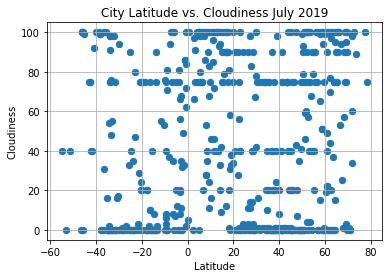

In [32]:
#Latitude vs. Cloudiness Plot
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", s=40)
plt.title("City Latitude vs. Cloudiness July 2019")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness_vs_Latitude.png")
plt.show()

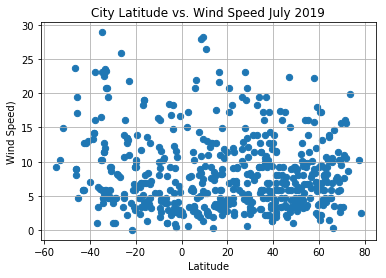

In [34]:
#Latitude vs. Wind Speed Plot
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o", s=40)
plt.title("City Latitude vs. Wind Speed July 2019")
plt.ylabel("Wind Speed)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Wind_Speed_vs_Latitude.png")
plt.show()
